# 4.10 IC Analysis - Final Task

## Content

1. **Importing Libraries**
2. **Importing Dataframe**
3. **Consistency Check - Crosstab from Exercise for days_since_prior_order**
4. **Task**  
   4.1 Note Security Implications  
   4.2 "Region" Column  
   4.3 Exclusion Falg low-activity Customers and Sample Creation  
   4.4 Creating profiling Variables  
       *4.4.1 Profiling Variable for Age*  
       *4.4.2 Profiling Variable for Income*  
       *4.4.3 Profiling Variables for certain Goods*  
       *4.4.4 Profiling Variables for Number of Dependents*  
       *4.4.5 Variable for "order_day_of_week"*  
        *4.4.6 Implementing Profiles in Data*  
       *4.4.7 Visual Distribution of Profiles*  
        *4.4.8 Aggregating max, mean and min variables on customer-profile levels for usage frequency and expenditure*  
       *4.4.9 Comparing Customer Profiles with Regions and Departments*
5. **Additional Graphs for Report**  
   5.1 Distribution of Products by Price Range  
    5.2 Most Frequently Ordered Departments  
    5.3 Brand Loyalty Distribution

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Importing Data Frame

In [17]:
# Creating the shortcut to project folder
path = r'/home/justem/CF - Data Analyst/Achievement 4/02-2025 Instacart Basket Analysis'

In [18]:
# Importing final data frame
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_data.pkl'))

## 3. Consistency Check - Crosstab from Exercise for days_since_prior_order

In [ ]:
# Creating the Crosstab to check the former missing values, that we already changed to "0"
crosstab_1 = pd.crosstab(df_final['days_since_prior_order'], df_final['order_number'], dropna = False)

In [ ]:
# Trying to copy the Crosstab to the clipboard - apparently this is a Linux issue but does not need to be fixed right now
crosstab_1.to_clipboard()

In [ ]:
# Displaying here because copying to Excel did not work - but we copied it to Consistency Check in the Report
display(crosstab_1)

## 4. Task

### 4.1 Note Security Implications

The last and first names got removed from the dataframe at an earlier point and nothing at this point can be used to identify any customers. The customer ID can not be used to identify any individuals without access to additional internal data. 

### 4.2 "Region" Column

In [4]:
# Defining the regions
region_map = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    # South
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South',
    'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',

    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West',
    'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West',
    'Oregon': 'West', 'Washington': 'West'
}

In [5]:
# Apply the mapping
df_final['region'] = df_final['state'].map(region_map)

In [ ]:
df_final.head()

In [ ]:
# Crosstab spending flag and region
crosstab = pd.crosstab(df_final['spending_flag'], df_final['region'], dropna = False)

In [ ]:
# Showing crosstab
display(crosstab)

In [ ]:
# Plot grouped bar chart
crosstab.plot(kind='bar', figsize=(10,6))
plt.title('Spending Behaviour by US Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Spending Flag')
plt.tight_layout()

This is not good to compare the regions for the High Spenders as well so I created two different bar Charts for that.

In [ ]:
# Data
regions = ['Midwest', 'Northeast', 'South', 'West']
high_spenders = [155975, 108225, 209691, 160354]

# Colour-blind palette
cb_palette = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c']  # Blue, Orange, Green, Red
region_order = ['Midwest', 'Northeast', 'South', 'West']
region_colours_cb = dict(zip(region_order, cb_palette))

# DataFrame
df_high = pd.DataFrame({'Region': regions, 'High Spenders': high_spenders})
df_high_sorted = df_high.sort_values(by='High Spenders', ascending=False)
colours_high = df_high_sorted['Region'].map(region_colours_cb)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_high_sorted['Region'], df_high_sorted['High Spenders'], color=colours_high)
plt.title('Number of High Spenders by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [ ]:
# Low spenders data
low_spenders = [7441350, 5614511, 10582194, 8132559]

# DataFrame
df_low = pd.DataFrame({'Region': regions, 'Low Spenders': low_spenders})
df_low_sorted = df_low.sort_values(by='Low Spenders', ascending=False)
colours_low = df_low_sorted['Region'].map(region_colours_cb)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_low_sorted['Region'], df_low_sorted['Low Spenders'], color=colours_low)
plt.title('Number of Low Spenders by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.ticklabel_format(style='plain', axis='y') #Disabaling scientific version
plt.show()

### 4.3 Exclusion Flag low-activity Customers and Sample Creation

In [ ]:
# Count total orders per user
order_counts = df_final['user_id'].value_counts()

In [ ]:
# Mapping that back to the original df
df_final['total_orders'] = df_final['user_id'].map(order_counts)

In [ ]:
df_final.shape

In [ ]:
df_final['low_activity_flag'] = df_final['total_orders'] < 5

In [ ]:
df_final.head()

In [ ]:
df_final['low_activity_flag'].value_counts(dropna = False)

In [ ]:
# Creating df with excluding low-activity customers
df_excluded = df_final[df_final['low_activity_flag'] == False]

In [ ]:
df_excluded['low_activity_flag'].value_counts(dropna = False)

In [ ]:
df_excluded.head()

In [ ]:
# Saving the df
df_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_excluded.pkl'))

### 4.4 Creating profiling Variables

#### 4.4.1 Profiling Variable for Age

In [6]:
# Assigning "age_group" label "Young_adult" to customers age < 25
df_final.loc[df_final['age'] < 25, 'age_group'] = 'Young_adult'

In [7]:
# Assigning "age_group" label "Adult" to customers age >= 25 & < 40
df_final.loc[(df_final['age'] >= 25) & (df_final['age'] < 40), 'age_group'] = 'Adult'

In [8]:
# Assigning "age_group" label "Middle-aged" to customers age >= 40 & < 60
df_final.loc[(df_final['age'] >= 40) & (df_final['age'] < 60), 'age_group'] = 'Middle-aged'

In [9]:
# Assigning "age_group" label "Senior" to customers age >= 60
df_final.loc[df_final['age'] >= 60, 'age_group'] = 'Senior'

In [ ]:
# Printing frequency
df_final['age_group'].value_counts(dropna = False)

In [ ]:
# Checking column
df_final['age_group']

In [ ]:
# Multiple columns with head() function
df_final[['age', 'age_group']].head(100)

#### 4.4.2 Profiling Variable for Income

In [ ]:
# Assigning "income_group" label "low_income" to customers income <= 50.000
df_final.loc[df_final['income'] <= 50000, 'income_group'] = 'low_income'

In [ ]:
# Assigning "income_group" label "middle_income" to customers income > 50.000 & < 150.000
df_final.loc[(df_final['income'] > 50000) & (df_final['income'] <= 150000), 'income_group'] = 'middle_income'

In [ ]:
# Assigning "income_group" label "high_income" to customers income > 150.000
df_final.loc[df_final['income'] > 150000, 'income_group'] = 'high_income'

In [ ]:
df_final.columns

In [ ]:
df_final.head()

In [ ]:
# Printing frequency
df_final['income_group'].value_counts(dropna = False)

In [ ]:
# Checking column
df_final['income_group']

In [ ]:
# Multiple columns with head() function
df_final[['income', 'income_group']].head(100)

#### 4.4.3 Profiling Variables for certain Goods

In [29]:
# Creating mapping dictionary
department_map = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Mapping department_id to grocery_category
df_final['grocery_category'] = df_final['department_id'].map(department_map)

In [30]:
# Printing frequency
df_final['grocery_category'].value_counts(dropna = False)

grocery_category
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [ ]:
# Multiple columns with head() function
df_final[['department_id', 'grocery_category']].head(100)

#### 4.4.4 Profiling Variables for Number of Dependents

In [11]:
# Assigning "dependents_group" label "Single_Household" to customers num dependents < 1
df_final.loc[df_final['num_dependants'] < 1, 'dependents_group'] = 'Single_Household'

In [12]:
# Assigning "dependents_group" label "Parent_Household" to customers num dependents >= 1
df_final.loc[df_final['num_dependants'] >= 1, 'dependents_group'] = 'Parent_Household'

In [ ]:
# Printing frequency
df_final['dependents_group'].value_counts(dropna = False)

In [ ]:
# Multiple columns with head() function
df_final[['num_dependants', 'dependents_group']].head(100)

#### 4.4.5 Variable for "orders_day_of_week"

In [13]:
# Create a mapping dictionary
dow_map = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Mapping day names into a new column
df_final['order_dow_name'] = df_final['orders_day_of_week'].map(dow_map)

In [ ]:
# Printing frequency
df_final['order_dow_name'].value_counts(dropna = False)

In [ ]:
# Multiple columns with head() function
df_final[['orders_day_of_week', 'order_dow_name']].head(100)

#### 4.4.6 Implementing Profiles in Data

In [14]:
# Creating new column for customer profile
df_final['customer_profile'] = None

In [15]:
# Assigning basic customer profiles based on combinations

df_final.loc[
    (df_final['age_group'] == 'Young_adult') & 
    (df_final['income_group'].isin(['low_income', 'middle_income'])) & 
    (df_final['dependents_group'] == 'Single_Household'), 
    'customer_profile'
] = 'Young Single'

df_final.loc[
    (df_final['age_group'] == 'Adult') & 
    (df_final['income_group'] == 'middle_income') & 
    (df_final['dependents_group'] == 'Parent_Household'), 
    'customer_profile'
] = 'Young Family'

df_final.loc[
    (df_final['age_group'] == 'Middle-aged') & 
    (df_final['income_group'] == 'high_income') & 
    (df_final['dependents_group'] == 'Parent_Household'), 
    'customer_profile'
] = 'Middle-Aged Professional'

df_final.loc[
    (df_final['age_group'] == 'Senior') & 
    (df_final['income_group'].isin(['low_income', 'middle_income'])) & 
    (df_final['dependents_group'] == 'Single_Household'), 
    'customer_profile'
] = 'Retired Senior'

df_final.loc[
    (df_final['age_group'] == 'Senior') & 
    (df_final['income_group'] == 'high_income') & 
    (df_final['dependents_group'] == 'Single_Household'), 
    'customer_profile'
] = 'Affluent Empty Nester'

df_final['customer_profile'].fillna('Other', inplace=True)

KeyError: 'income_group'

In [ ]:
# Printing frequency
df_final['customer_profile'].value_counts(dropna = False)

In [ ]:
# Multiple columns with head() function
df_final[['customer_profile', 'income_group', 'dependents_group', 'age_group']].head(100)

We have a high number of "Other" profiles, we would have to check with the Marketing Department if they want the customer profiles to be like that or set up in different ways.

In [ ]:
# Checking most common combinations in the 'Other' category
df_final[df_final['customer_profile'] == 'Other'].groupby(
    ['age_group', 'income_group', 'dependents_group']
).size().sort_values(ascending=False)

Possible other profiles would be: 
- Seniors with mid income and kids at home
- Classig working family segment
- Young adults starting a family
- Solo, stable earners
- Affluent older parents

#### 4.4.7 Visual Distribution of Profiles

In [ ]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
profile_counts = df_final['customer_profile'].value_counts().sort_values(ascending=False)
sns.barplot(x=profile_counts.index, y=profile_counts.values)

# Adding labels and title
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_customer_profiles.png'))

# Showing the plot
plt.show()

In [ ]:
# Exporting data frame with customer profiles
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_profiles.pkl'))

#### 4.4.8 Aggregating max, mean and min variables on customer-profile levels for usage frequency and expenditure

In [ ]:
# Groupping by customer profile
profile_summary = df_final.groupby('customer_profile').agg(
    max_orders=('order_number', 'max'),
    mean_orders=('order_number', 'mean'),
    min_orders=('order_number', 'min'),
    max_spending=('prices', 'max'),
    mean_spending=('prices', 'mean'),
    min_spending=('prices', 'min')
)

# Round for cleaner output
profile_summary = profile_summary.round(2)

# Displaying the summary
print(profile_summary)

#### 4.4.9 Comparing Customer Profiles with Regions and Departments

In [ ]:
# Counting number of rows per profile and region
profile_region = df_final.groupby(['customer_profile', 'region'])['user_id'].count().unstack()

# Plotting as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(profile_region, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Customer Profiles by Region')
plt.ylabel('Customer Profile')
plt.xlabel('Region')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'heatmap_profiles_by_region.png'))
plt.show()

The big "Other" category is making it harder to see the other distributions but that would be changed after talking with a seniour data analyst or/and the marketing department. 
Though it seems pretty clear that families seem to be more in the South Region.

In [ ]:
# Counting how often each profile buys from each department
profile_dept = df_final.groupby(['customer_profile', 'grocery_category'])['product_id'].count().unstack().fillna(0)

# Plotting top 6 departments to keep it readable
top_depts = profile_dept.sum().sort_values(ascending=False).head(6).index
profile_dept_subset = profile_dept[top_depts]

# Plotting as grouped bar chart
profile_dept_subset.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title('Top 6 Departments by Customer Profile')
plt.ylabel('Number of Products Bought')
plt.xlabel('Customer Profile')
plt.xticks(rotation=45)
plt.legend(title='Grocery Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_profiles_by_department.png'))
plt.show()

Here also the "Other" profile makes it a bit difficult do see the others but it seems clear that especially produce and dairy eggs are very popular with families, as expected.

### 5. Additional Graphs for Report

#### 5.1 Distribution of Products by Price Range

In [25]:
# Creating column for price ranges - somehow it's missing

df_final.loc[df_final['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_final.loc[(df_final['prices'] <= 15) & (df_final['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
df_final.loc[df_final['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [26]:
# Checking frequency
df_final['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

/tmp/ipykernel_20841/1563309423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_counts.index, y=price_counts.values, palette='colorblind')


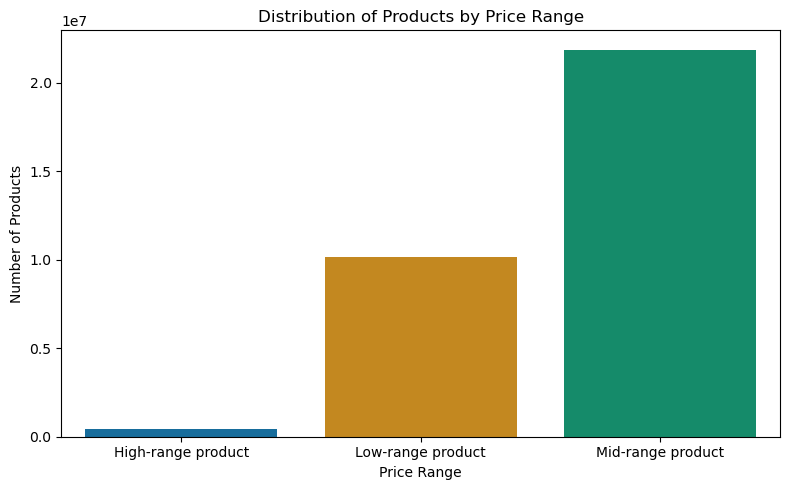

In [27]:
#Creating Bar Chart Distribution of Products by Price Range
price_counts = df_final['price_range_loc'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=price_counts.index, y=price_counts.values, palette='colorblind')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.tight_layout()

# Saving to Visualisations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_price_range_distribution.png'))

plt.show()

#### 5.2 Most Frequently Ordered Departments

/tmp/ipykernel_20841/4218498658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette='colorblind')


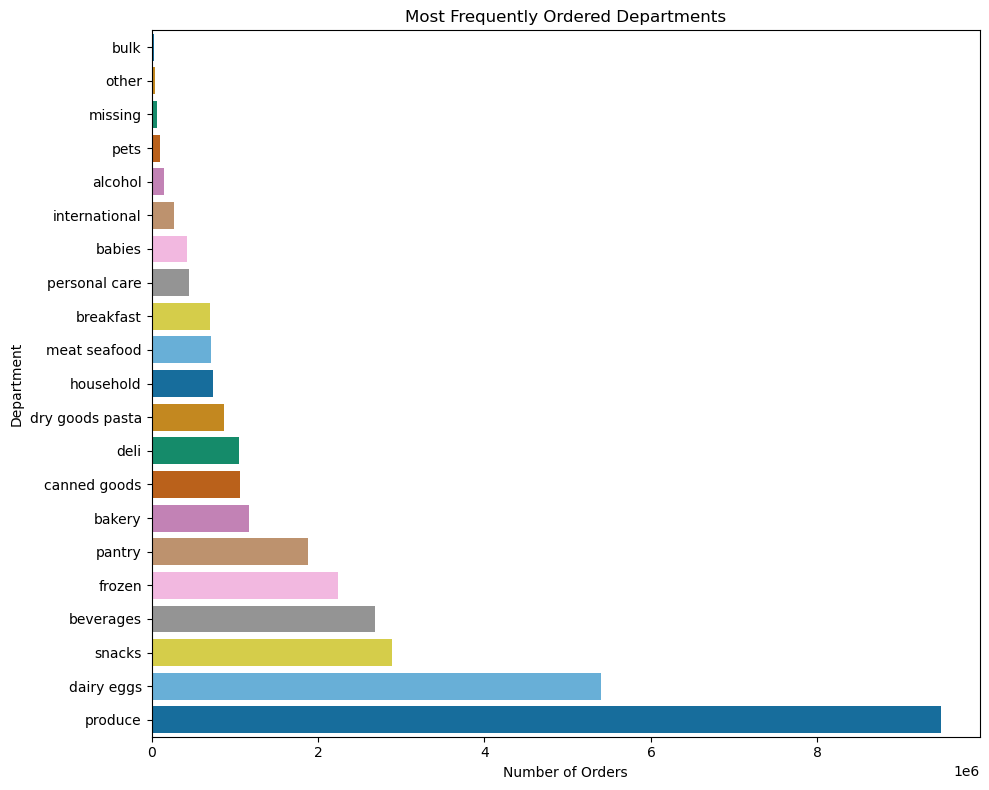

In [33]:
# Creating horizontal Bar chart of Most Frequently Ordered Departments
dept_counts = df_final['grocery_category'].value_counts().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette='colorblind')
plt.title('Most Frequently Ordered Departments')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.tight_layout()

# Saving graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_most_ordered_departments.png'))
plt.show()

#### 5.3 Brand Loyalty Distribution

/tmp/ipykernel_20841/4153315089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='colorblind')


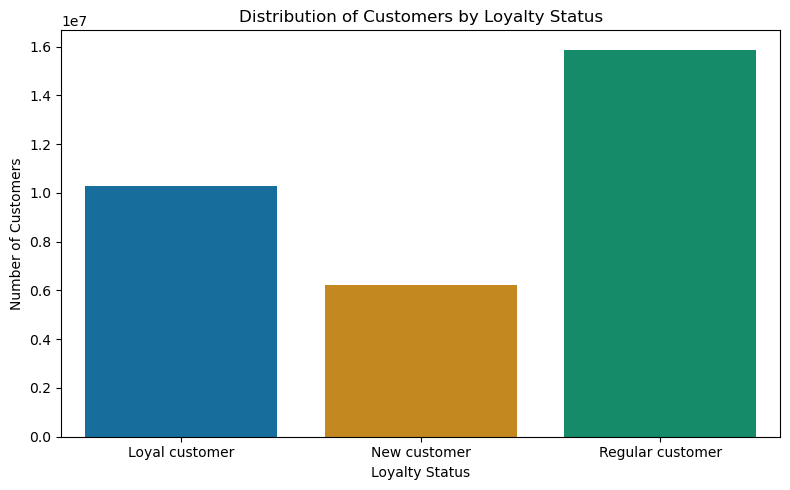

In [32]:
# Creating Bar chart Distribution of Customers by Loyalty Status
loyalty_counts = df_final['loyalty_flag'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='colorblind')
plt.title('Distribution of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.tight_layout()

# Saving Bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_distribution.png'))
plt.show()
